<a href="https://colab.research.google.com/github/shiroleshreya/obesity-prediction/blob/main/obesity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.shape

(2111, 17)

In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(exclude = ['object']).columns:
    if i == 'Height':
        df[i] = df[i].round(2)
    elif  i =='Weight':
        df[i] = df[i].round(1)
    else:
        df[i] = df[i].round(0)

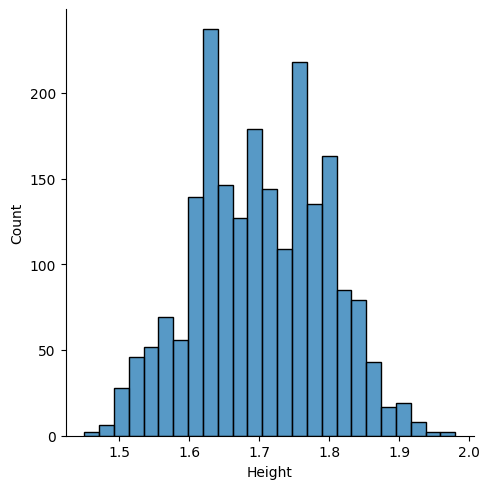

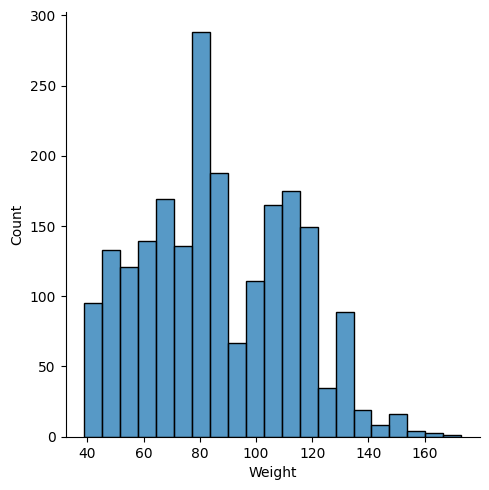

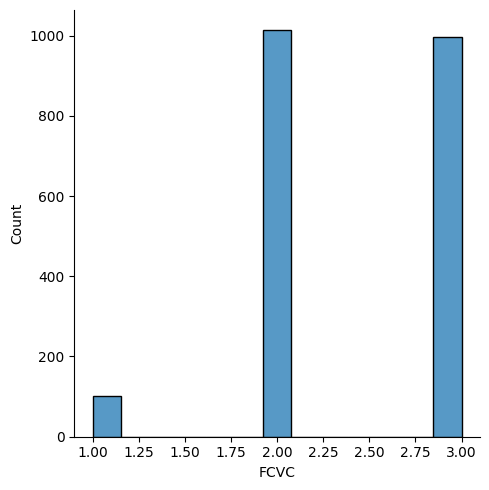

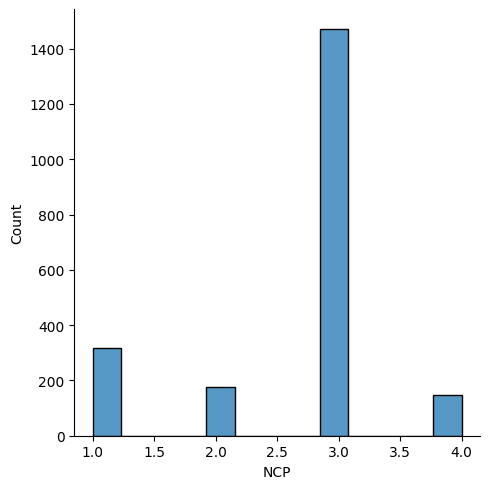

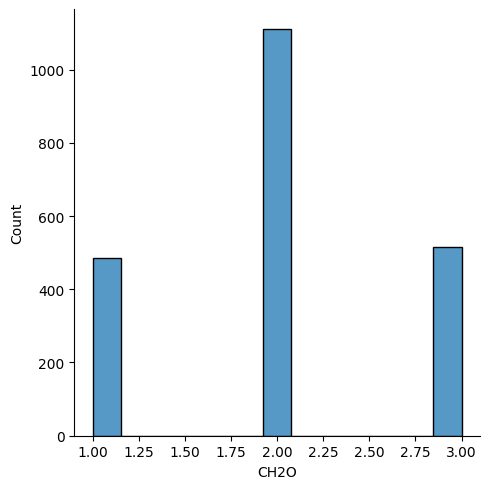

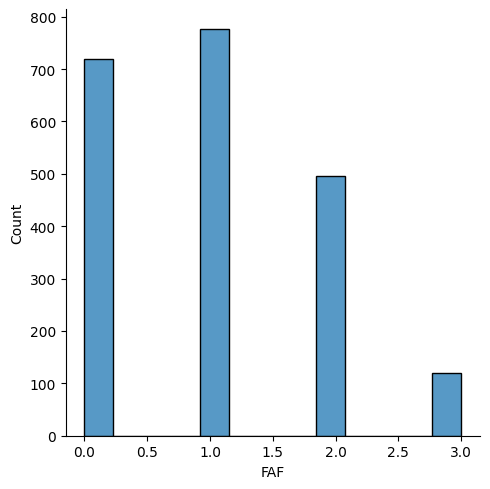

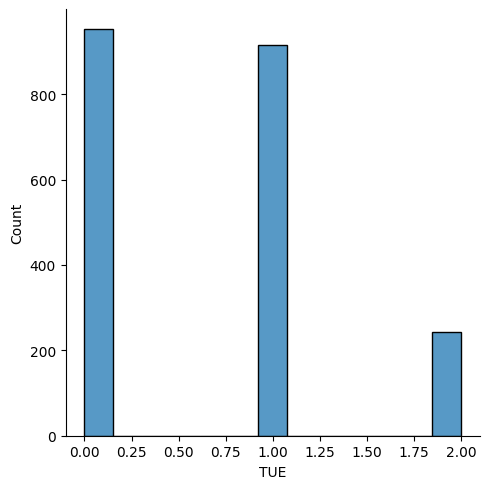

In [ ]:
def distplots(col):
    sns.displot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = ['object']).columns)[1:]:
    distplots(i)

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

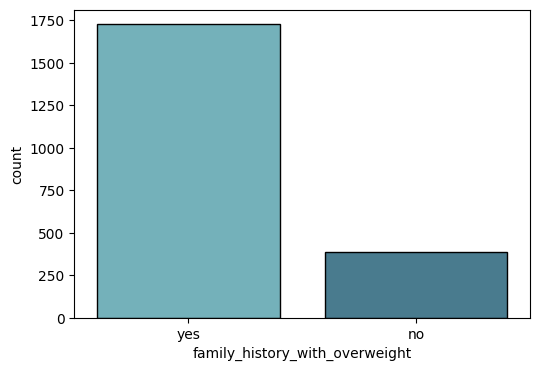

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df[['Gender','family_history_with_overweight', 'FAVC','CAEC', 'SMOKE', 'SCC',
     'CALC', 'MTRANS','NObeyesdad']]= df[['Gender','family_history_with_overweight', 'FAVC','CAEC', 'SMOKE', 'SCC',
     'CALC', 'MTRANS','NObeyesdad']].apply(encoder.fit_transform)






"from sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ndf['Gender'] = encoder.fit_transform(df['Gender'])\ndf['family_history_with_overweight'] = encoder.fit_transform(df['family_history_with_overweight'])\ndf['FAVC'] = encoder.fit_transform(df['FAVC'])\ndf['CAEC'] = encoder.fit_transform(df['CAEC'])\ndf['SMOKE'] = encoder.fit_transform(df['SMOKE'])\ndf['SCC'] = encoder.fit_transform(df['SCC'])\ndf['CALC'] = encoder.fit_transform(df['CALC'])\ndf['MTRANS'] = encoder.fit_transform(df['MTRANS'])\ndf['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])"

In [ ]:
x = df.drop('NObeyesdad', axis =1)
y = df['NObeyesdad']

In [ ]:
x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [ ]:
y.head()

0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

def model_predict(X_train: pd.DataFrame, y_train: pd.DataFrame,X_test: pd.DataFrame, y_test: pd.DataFrame):

    models =[
        ('Random Forest', RandomForestClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier())

    ]
    for name, model in models:
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("                            -----------------------------------               \n")
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
            print("                            -----------------------------------               \n")
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))
            print("                            -----------------------------------               \n")

In [ ]:
model_predict(X_train,y_train, X_test,y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.94697
Accuracy w/Scaled Data (ss): 0.93561
Accuracy w/Scaled Data (mm): 0.93939

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        68
           1       0.79      0.93      0.85        72
           2       0.96      0.97      0.96        88
           3       1.00      0.99      0.99        74
           4       1.00      0.99      0.99        81
           5       0.93      0.88      0.90        73
           6       0.99      0.92      0.95        72

    accuracy                           0.95       528
   macro avg       0.95      0.95      0.95       528
weighted avg       0.95      0.95      0.95       528

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.92614
Accuracy w/Scaled Data (ss): 0

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

print("Decision Tree:\n")
dt = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(dt, x, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

print("\nKNN:\n")
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv = 5)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

print("\nRandom Forest:\n")
rf=RandomForestClassifier(n_estimators=42)
scores=cross_val_score(rf, x, y,cv=5)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Decision Tree:

Cross Validation Scores:  [0.678487   0.90995261 0.8436019  0.95260664 0.96919431]
Average CV Score:  0.8707684895745802
Number of CV Scores used in Average:  5

KNN:

Cross Validation Scores:  [0.80851064 0.88862559 0.90758294 0.87914692 0.90758294]
Average CV Score:  0.8782898053846928
Number of CV Scores used in Average:  5

Random Forest:

Cross Validation Scores:  [0.78250591 0.96445498 0.97393365 0.97630332 0.97630332]
Average CV Score:  0.9347002341657984
Number of CV Scores used in Average:  5
